In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Pie charts


In [5]:
# example 1
Degree_needed = df['job_no_degree_mention'].value_counts()
Degree_needed

job_no_degree_mention
False    544965
True     240776
Name: count, dtype: int64

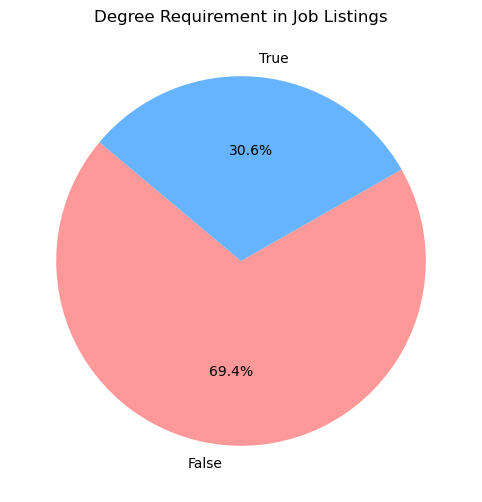

In [4]:
#plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(Degree_needed, labels=Degree_needed.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Degree Requirement in Job Listings')
plt.show()

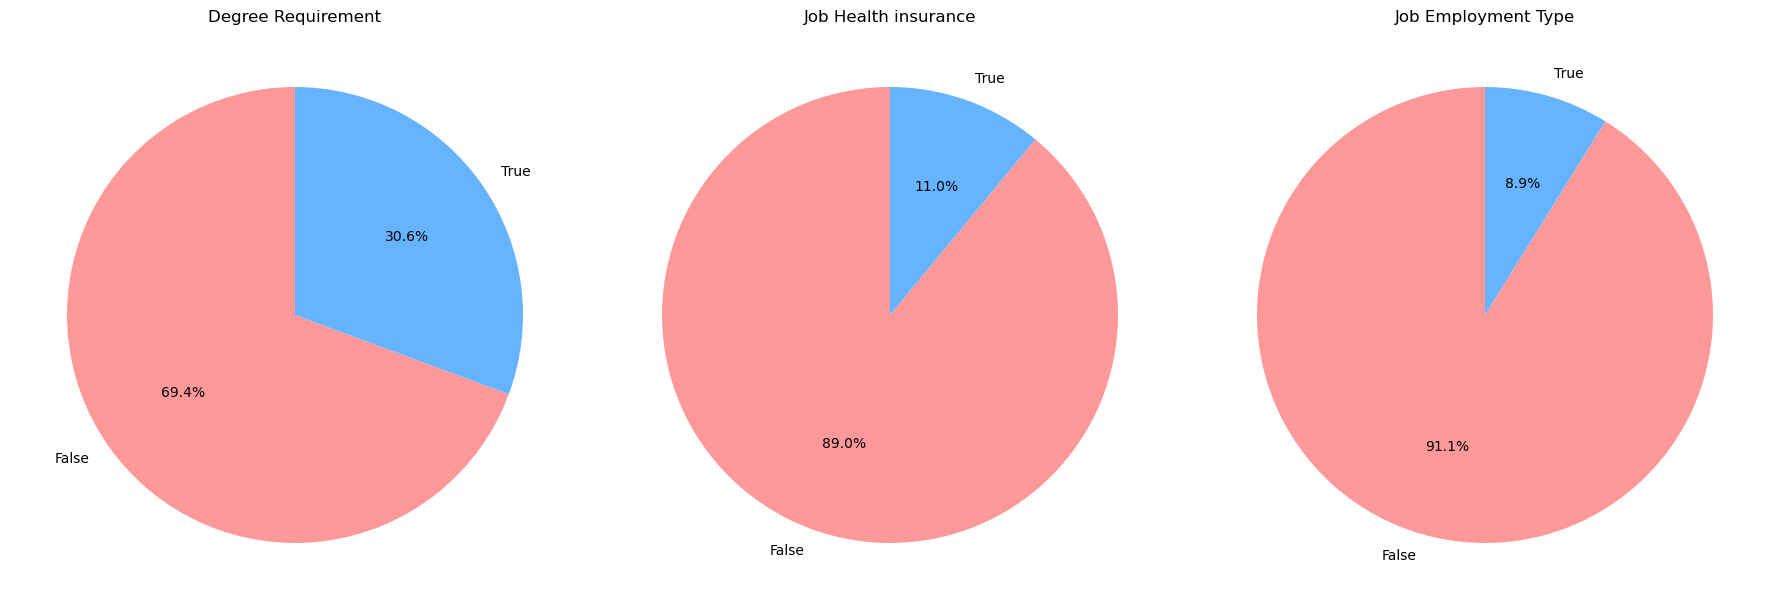

In [7]:
# now in subplots with 2 others
# set up the matplotlib figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# here we are creaating a loop to plot 3 pie charts
dict_plots = {
    'Degree_Requirement': df['job_no_degree_mention'].value_counts(),
    'Job_Health_insurance': df['job_health_insurance'].value_counts(),
    'Job_Employment_Type': df['job_work_from_home'].value_counts()
}
for i, (title, data) in enumerate(dict_plots.items()):
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    axs[i].set_title(title.replace('_', ' ')) 
plt.tight_layout()
plt.show()